In [1]:
import os
import arcgis
from arcgis.gis import GIS
from arcgis.features import FeatureLayerCollection
import pandas as pd
import geopandas as gpd
import requests
import json
from datetime import date, datetime

In [2]:
yearDate = date.today().strftime('%m%d%y')
print(str(datetime.now()) + " Running 7_Update_COVID_ArcGIS_Online_Layers")
print(yearDate)

2020-11-16 12:54:29.334854 Running 7_Update_COVID_ArcGIS_Online_Layers
111620


In [3]:
gis = GIS()

In [4]:
uflURL = "https://ufl.maps.arcgis.com/"

In [5]:
with open("env.json", "r") as f:
    tokenfile = json.load(f)

In [6]:
# expire Nov 27, 2020
my_token = tokenfile['token']

In [7]:
AGOLConnection = GIS(token=my_token)

In [8]:
print(AGOLConnection.users.__dict__)

{'_gis': GIS @ https://www.arcgis.com version:8.3, '_portal': <arcgis.gis._impl._portalpy.Portal object at 0x7ffcfae14430>, '_me': <User username:xiaohui.qiao_ufl>}


### Update COVID 14 days Health Metrics layer

In [9]:
print("Updating COVID 14 days Health Metrics layer")
covid14_zip_file = "publish/covid_14_metrics{}.zip".format(yearDate)

Updating COVID 14 days Health Metrics layer


<Item title:"COVID 14 days Health Metrics" type:Feature Layer Collection owner:xiaohui.qiao_ufl>
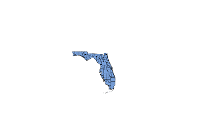

In [10]:
covid14_content = AGOLConnection.content.get('e59aafcbc5bc4287ab0351abbdee45fb')
covid14_content

In [11]:
covid14_collection = FeatureLayerCollection.fromitem(covid14_content)

In [12]:
response = covid14_collection.manager.overwrite(covid14_zip_file)
print(response)

{'success': True}


### Update Florida COVID Hospital ICU Census layer

In [13]:
print("Updating Florida COVID Hospital ICU Census layer")
hosp_icu_zip_file = "publish/Florida_County_Hospital_ICU{}.zip".format(yearDate)

Updating Florida COVID Hospital ICU Census layer


<Item title:"Florida COVID Hospital ICU Census" type:Feature Layer Collection owner:xiaohui.qiao_ufl>
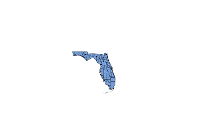

In [14]:
Hosp_ICU_content = AGOLConnection.content.get('380c8b04f3c440528df0eebf89b0bd64')
Hosp_ICU_content

In [15]:
Hosp_ICU_collection = FeatureLayerCollection.fromitem(Hosp_ICU_content)

In [16]:
reponse_hosp = Hosp_ICU_collection.manager.overwrite(hosp_icu_zip_file)
print(reponse_hosp)

{'success': True}


### Update Florida COVID 19 Health Metrics layer

In [17]:
print("Updating Florida COVID 19 Health Metrics layer¶")
covid_daily_zip_file = "publish/covid_impact_poly{}.zip".format(yearDate)

Updating Florida COVID 19 Health Metrics layer¶


<Item title:"Florida COVID 19 Health Metrics" type:Feature Layer Collection owner:xiaohui.qiao_ufl>
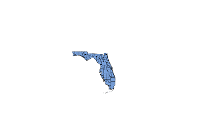

In [18]:
covid_daily_content = AGOLConnection.content.get('2214f2f45aa24cd5bb4ff0175fcf8a2c')
covid_daily_content

In [19]:
covid_daily_collection = FeatureLayerCollection.fromitem(covid_daily_content)

In [20]:
response_covid = covid_daily_collection.manager.overwrite(covid_daily_zip_file)
print(response_covid)

{'success': True}


In [21]:
print(str(datetime.now()) + " Done with 7_Update_COVID_ArcGIS_Online_Layers")

2020-11-16 12:56:27.900920 Done with 7_Update_COVID_ArcGIS_Online_Layers
